<a href="https://colab.research.google.com/github/dikshi-shah/Battery-Lifespan-prediction-Web-App/blob/main/battery_life_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
data = pd.read_csv('/content/Battery_RUL.csv')
data

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107
...,...,...,...,...,...,...,...,...,...
15059,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4
15060,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3
15061,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2
15062,1111.0,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1


In [ ]:
data.describe(include = 'all')

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


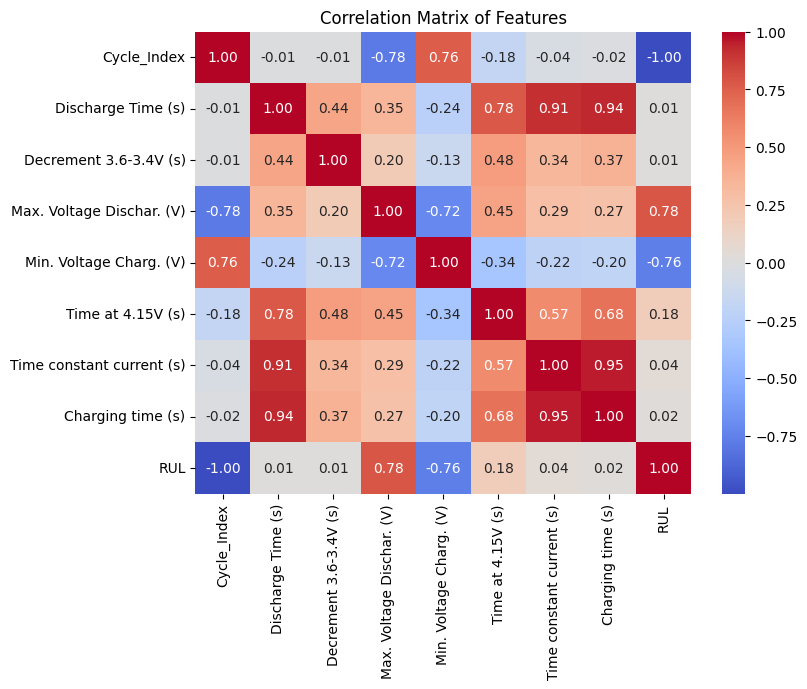

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
X=data.drop(labels=['RUL'], axis=1)
y=data['RUL']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaling_pipeline_X = Pipeline([
    ('scaler', StandardScaler()),
    ('minmax', MinMaxScaler())
])

X_train = pd.DataFrame(scaling_pipeline_X.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaling_pipeline_X.transform(X_val), columns=X_val.columns)
X_test = pd.DataFrame(scaling_pipeline_X.transform(X_test), columns=X_test.columns)

y_scaler = MinMaxScaler()

y_train = pd.Series(y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten(), index=y_train.index)
y_val = pd.Series(y_scaler.transform(y_val.values.reshape(-1, 1)).flatten(), index=y_val.index)
y_test = pd.Series(y_scaler.transform(y_test.values.reshape(-1, 1)).flatten(), index=y_test.index)

with open('scalers.pkl', 'wb') as f:
    pickle.dump((scaling_pipeline_X, y_scaler), f)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 4,random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

with open('PCA.pkl', 'wb') as f:
    pickle.dump((pca), f)

In [ ]:
# Acertainning dependency between features and a continuous target  variable,
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(X_train_pca,y_train)
mutual_info

array([3.4833033 , 0.97743138, 0.94800966, 0.81675162])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.sort_values(ascending=False)

,0
0,3.483303
1,0.977431
2,0.948010
3,0.816752


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LeakyReLU


tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(25,activation= 'relu'),
    tf.keras.layers.Dense(36),
    tf.keras.layers.Dense(48,activation= 'selu')
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(81,activation='selu'),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

model.fit(X_train_pca,y_train,epochs = 50,validation_data=(X_val_pca, y_val))

Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0488 - mae: 0.0488 - val_loss: 0.0062 - val_mae: 0.0062
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0096 - mae: 0.0096 - val_loss: 0.0122 - val_mae: 0.0122
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0094 - mae: 0.0094 - val_loss: 0.0152 - val_mae: 0.0152
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0089 - mae: 0.0089 - val_loss: 0.0057 - val_mae: 0.0057
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0082 - mae: 0.0082 - val_loss: 0.0070 - val_mae: 0.0070
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0065 - mae: 0.0065 - val_loss: 0.0064 - val_mae: 0.0064
Epoch 7/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0067 - mae: 0.0067 - val_loss: 0.0073 - val_mae: 0.0073
Epoch 8/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0062 - mae: 0.0062 - val_loss: 0.0064 - val_mae: 0.0064
Epoch 9/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - l

In [ ]:
# Evaluate the model on the training data
loss_train, MAE_train = model.evaluate(X_train_pca, y_train)
print(f"Training Loss: {loss_train:.4f}")
print(f"Training MAE: {MAE_train:.4f}")

330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0043 - mae: 0.0043
Training Loss: 0.0042
Training MAE: 0.0042


In [ ]:
y_pred_scaled = model.predict(X_test_pca)
loss_test, MAE_test = model.evaluate(X_test_pca, y_test)
print(f"Test Loss: {loss_test:.4f}")
print(f"Test MAE: {MAE_test:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0038 - mae: 0.0038
Test Loss: 0.0040
Test MAE: 0.0040


In [ ]:
from sklearn.metrics import mean_absolute_error

# Load the scalers
with open('scalers.pkl', 'rb') as f:
    scaling_pipeline_X, y_scaler = pickle.load(f)

y_test_original = y_scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()
y_pred_original = y_scaler.inverse_transform(y_pred_scaled).flatten()

true_mae_1 = mean_absolute_error(y_test_original, y_pred_original)
print(f"Model 1 True MAE on original scale: {true_mae_1:.4f}")

results_df_1 = pd.DataFrame({
    'Actual RUL': y_test_original,
    'Predicted RUL': y_pred_original
})

display(results_df_1)

Model 1 True MAE on original scale: 4.5574


,Actual RUL,Predicted RUL
0,4.0,3.688525
1,587.0,585.556702
2,913.0,908.410706
3,413.0,409.637360
4,960.0,961.455688
...,...,...
2255,945.0,945.726562
2256,913.0,914.178467
2257,619.0,613.288757
2258,279.0,270.045990


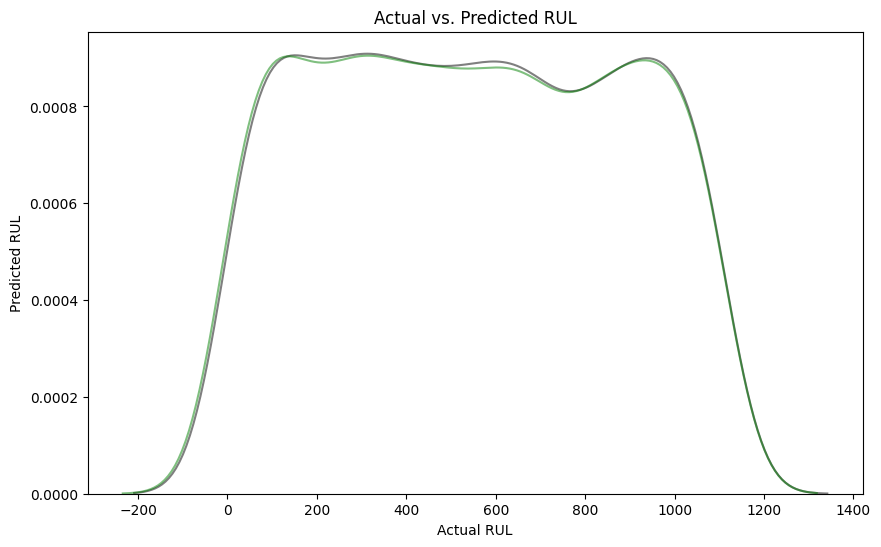

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test_original, color='black', label='y test distribution', alpha=0.5)
sns.kdeplot(y_pred_original, color='green', label='y pred_1 distribution', alpha=0.5)
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs. Predicted RUL')
plt.show()

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


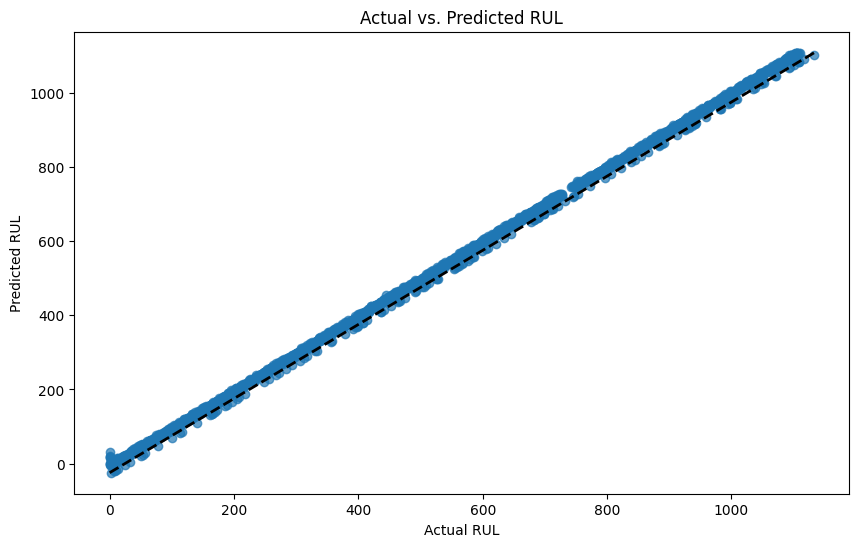

In [ ]:
y_pred_1 = model.predict(X_test_pca)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.7)
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs. Predicted RUL')
plt.plot([y_test_original.min(), y_test_original.max()], [y_pred_original.min(), y_pred_original.max()], 'k--', lw=2)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LeakyReLU

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(36,activation='elu' ),
    # tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(48),
    tf.keras.layers.Dense(64,activation='selu'),
    tf.keras.layers.Dense(81,activation='elu'),
    tf.keras.layers.Dense(1),
])

model_1.compile(loss= 'mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

model_1.fit(X_train_pca,y_train,epochs = 50, validation_data=(X_val_pca,y_val))

Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0582 - mae: 0.0582 - val_loss: 0.0142 - val_mae: 0.0142
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0097 - mae: 0.0097 - val_loss: 0.0119 - val_mae: 0.0119
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0093 - mae: 0.0093 - val_loss: 0.0081 - val_mae: 0.0081
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0077 - mae: 0.0077 - val_loss: 0.0045 - val_mae: 0.0045
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0067 - mae: 0.0067 - val_loss: 0.0059 - val_mae: 0.0059
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0072 - mae: 0.0072 - val_loss: 0.0082 - val_mae: 0.0082
Epoch 7/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0070 - mae: 0.0070 - val_loss: 0.0063 - val_mae: 0.0063
Epoch 8/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0063 - mae: 0.0063 - val_loss: 0.0048 - val_mae: 0.0048
Epoch 9/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

In [ ]:
# Evaluate the model on the training data
loss_train, MAE_train = model_1.evaluate(X_train_pca, y_train)
print(f"Training Loss: {loss_train:.4f}")
print(f"Training MAE: {MAE_train:.4f}")

330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0057 - mae: 0.0057
Training Loss: 0.0057
Training MAE: 0.0057


In [ ]:
y_pred_scaled_1 = model_1.predict(X_test_pca)
loss_test, MAE_test = model_1.evaluate(X_test_pca, y_test)
print(f"Test Loss: {loss_test:.4f}")
print(f"Test MAE: {MAE_test:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052 - mae: 0.0052
Test Loss: 0.0054
Test MAE: 0.0054


In [ ]:
from sklearn.metrics import mean_absolute_error

# Load the scalers
with open('scalers.pkl', 'rb') as f:
    scaling_pipeline_X, y_scaler = pickle.load(f)

y_test_original = y_scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()
y_pred_original_1 = y_scaler.inverse_transform(y_pred_scaled_1).flatten()

true_mae_1 = mean_absolute_error(y_test_original, y_pred_original_1)
print(f"Model 1 True MAE on original scale: {true_mae_1:.4f}")

results_df_1 = pd.DataFrame({
    'Actual RUL': y_test_original,
    'Predicted RUL': y_pred_original_1
})

display(results_df_1)

Model 1 True MAE on original scale: 6.1670


,Actual RUL,Predicted RUL
0,4.0,4.595870
1,587.0,580.059937
2,913.0,903.323669
3,413.0,410.292908
4,960.0,955.317566
...,...,...
2255,945.0,941.100708
2256,913.0,909.410400
2257,619.0,611.935120
2258,279.0,268.910706


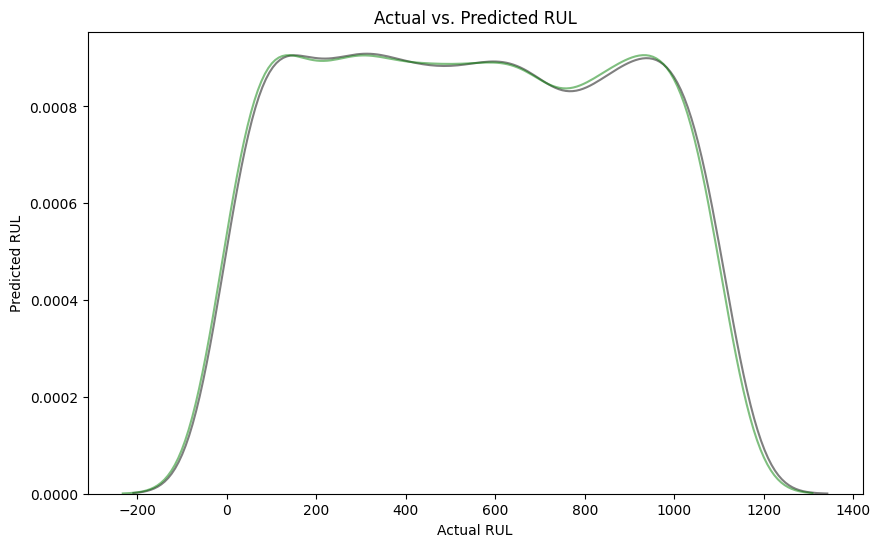

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test_original, color='black', label='y test distribution', alpha=0.5)
sns.kdeplot(y_pred_original_1, color='green', label='y pred_1 distribution', alpha=0.5)
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs. Predicted RUL')
plt.show()

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


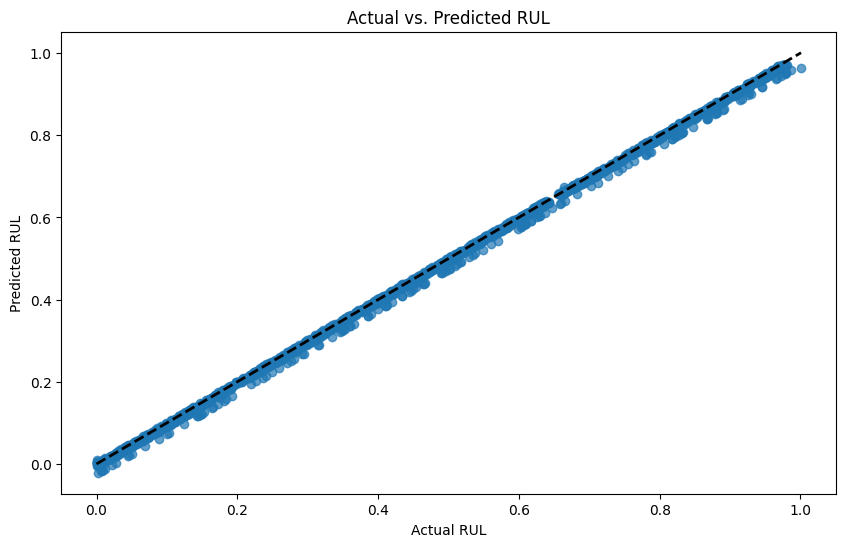

In [ ]:
y_pred_1 = model_1.predict(X_test_pca)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_1, alpha=0.7)
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs. Predicted RUL')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [ ]:
with open('Model.pkl', 'wb') as f:
    pickle.dump((model_1), f)